In [1]:
import matplotlib.pyplot as plt

In [2]:
from simple3D.utils import generate_neighbors_and_distances
from simple3D.spatial_optimizer import SpatialOptimizer

## Create 2 molecules and add simulated contact observations 

In [3]:
# Neighboring pairs of particlesin order to assign each particl to its molecule/chromosome
N = 100
neighbor_pairs, desired_distances = generate_neighbors_and_distances(
    num_labels_per_group = N//2,  # we have to groups of particles
    probability_creating_distance=0.2,  # between any 2 particles
    seed=0)

## Distance normalization

In [4]:
# normalize/transform distances, the best is to put a unique, low objective distance.
# in this case we define that any two particles observed to be in contact (Hi-C, FISH etc...),
# that is having a `d` value below 8, should be at a distance of 0.1.
# both numbers are parameters that can be modified and even variable inside a single optimization process
desired_distances = [(i, j, 0.1) for i, j, d in desired_distances if d < 8]

## Optimize distances between particles based using SciPy

In [5]:
# Create an instance of SpatialOptimizer
optimizer = SpatialOptimizer(N, neighbor_pairs, desired_distances)

# Run the optimizations in parallel and store the solutions and scores as class attributes
optimizer.run_optimizations_parallel(100, method='L-BFGS-B', n_cpus=12)

Completed processes:      100

## Check results

In [6]:
len([r for r in optimizer.models if r.success])

100

### Overview the satisfaction of the restraints along models 

/tmp/ipykernel_594211/759619938.py:8: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


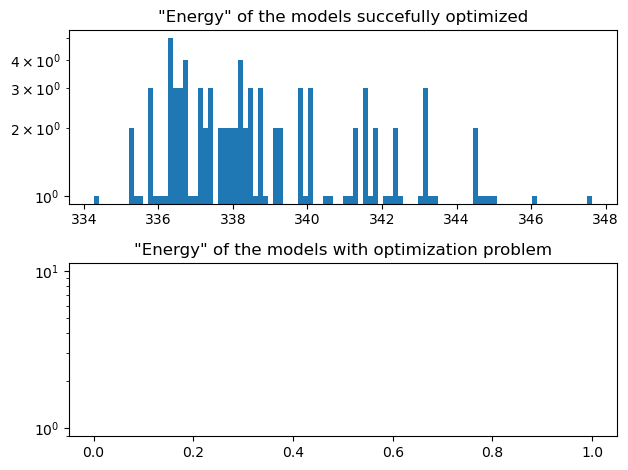

In [7]:
plt.subplot(211)
plt.title('"Energy" of the models succefully optimized')
plt.hist([r.fun for r in optimizer.models if r.success], bins=100);
plt.yscale('log')
plt.subplot(212)
plt.title('"Energy" of the models with optimization problem')
plt.hist([r.fun for r in optimizer.models if not r.success], bins=100);
plt.yscale('log')
plt.tight_layout()

*we observe at least model with high energy to be removed from the analysis... Ideally we would only keep top 50% of the models generated.*

### view 3D model

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

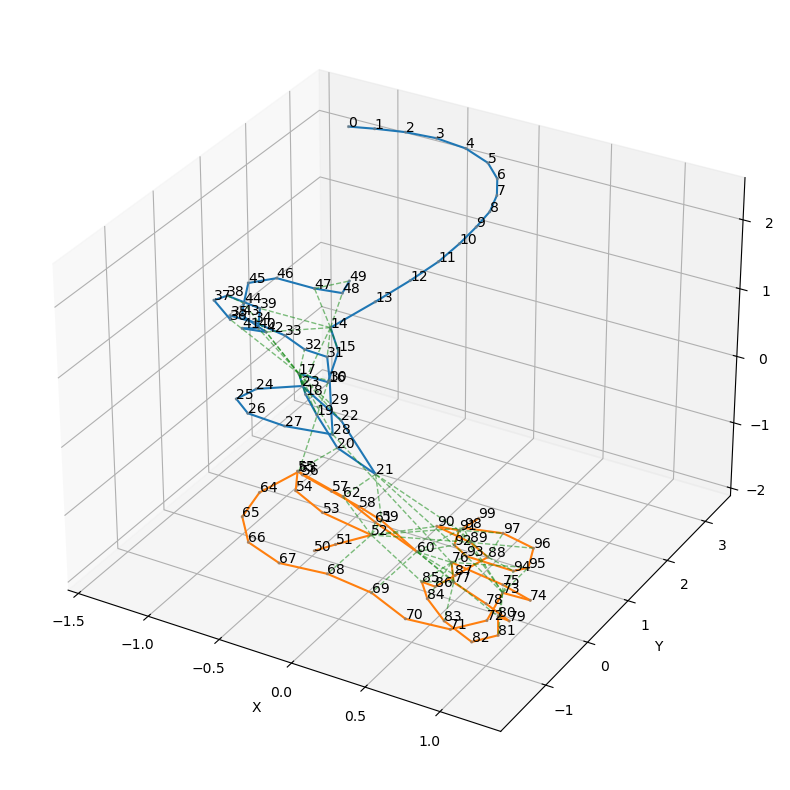

In [8]:
optimizer.view(0)

*Dotted green lines show restraint applied based on observed contacts.*